# Capstone Project 1: Data Wrangling

In [60]:
import pandas as pd #for building pandas dataframes for analysis

import glob, os #for reading file names

import numpy as np #fundamental package for scientific computing with Python

from datetime import datetime, date #Create auto date/time

# Data Wrangling

### Chicago Data

#### Reading all necessary CSV files for Chicago

In [61]:
#Reading all necessary CSV files for Chicago
file_names_Ch = []
file_names_Ch = glob.glob('/Users/carolinerosefrensko/Downloads/US Cities/s3_files 2/Chicago/*.csv')

#Creating a dataframe from all of the CSV files for Chicago
counter = 0
for file in file_names_Ch :
    if counter == 0 :
        A_dfch = pd.read_csv(file, index_col=False)
    if counter > 0 :
        A_df2 = pd.read_csv(file, index_col=False)
        A_dfch = A_dfch.append(A_df2)
    counter += 1
print('DONE LOADING FILES')

DONE LOADING FILES


#### Data Info

In [62]:
#Brief introduction to the columns of the joined datafames
A_dfch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159181 entries, 0 to 5810
Data columns (total 19 columns):
accommodates            153513 non-null float64
bathrooms               0 non-null float64
bedrooms                150377 non-null float64
borough                 0 non-null float64
city                    24426 non-null object
country                 0 non-null float64
host_id                 159178 non-null float64
last_modified           159181 non-null object
latitude                159181 non-null float64
location                24426 non-null object
longitude               159181 non-null float64
minstay                 96087 non-null float64
neighborhood            159181 non-null object
overall_satisfaction    127587 non-null float64
price                   159181 non-null float64
reviews                 159181 non-null int64
room_id                 159181 non-null int64
room_type               159171 non-null object
survey_id               24426 non-null float64
dtypes:

#### Rows & Columns

In [63]:
A_dfch.shape

(159181, 19)

#### Count of null values in data

In [64]:
A_dfch.isnull().sum()

accommodates              5668
bathrooms               159181
bedrooms                  8804
borough                 159181
city                    134755
country                 159181
host_id                      3
last_modified                0
latitude                     0
location                134755
longitude                    0
minstay                  63094
neighborhood                 0
overall_satisfaction     31594
price                        0
reviews                      0
room_id                      0
room_type                   10
survey_id               134755
dtype: int64

#### Preview of top rows of data

In [65]:
A_dfch.head()

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,longitude,minstay,neighborhood,overall_satisfaction,price,reviews,room_id,room_type,survey_id
0,2.0,NaN,0.0,NaN,NaN,NaN,2153.0,2013-12-23 21:34:36,41.898283,NaN,-87.630834,3.0,Near North,NaN,93.0,0,1947,Private room,NaN
1,8.0,NaN,3.0,NaN,NaN,NaN,5775.0,2013-12-23 22:19:43,41.854953,NaN,-87.696962,2.0,Lawndale,5.0,98.0,186,4505,Entire home/apt,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,14175.0,2013-12-23 20:15:03,41.784508,NaN,-87.597431,2.0,Woodlawn,5.0,44.0,111,6453,Private room,NaN
3,14.0,NaN,4.0,NaN,NaN,NaN,15365.0,2013-12-23 21:17:56,41.929262,NaN,-87.660091,4.0,Wrightwood Neighbors,4.5,296.0,46,6715,Entire home/apt,NaN
4,2.0,NaN,0.0,NaN,NaN,NaN,2153.0,2013-12-23 23:41:04,41.898786,NaN,-87.632196,1.0,Near North,NaN,104.0,0,7005,Private room,NaN


#### Drop columns with all NaN (null) values

In [66]:
#Drop all columns that have greater than 90% of data missing for accurate analysis
result = A_dfch.drop(['bathrooms','borough','city','country','host_id','last_modified','location','latitude','longitude','room_id','survey_id'], axis=1)
result.head()


,accommodates,bedrooms,minstay,neighborhood,overall_satisfaction,price,reviews,room_type
0,2.0,0.0,3.0,Near North,NaN,93.0,0,Private room
1,8.0,3.0,2.0,Lawndale,5.0,98.0,186,Entire home/apt
2,3.0,NaN,2.0,Woodlawn,5.0,44.0,111,Private room
3,14.0,4.0,4.0,Wrightwood Neighbors,4.5,296.0,46,Entire home/apt
4,2.0,0.0,1.0,Near North,NaN,104.0,0,Private room


#### Filter out rows with null prices or null bedrooms

Dropping all rows of columns that have null values for better comparison.

In [67]:
result = result[result['price'].notnull()]
result.shape

(159181, 8)

In [68]:
result = result[result['bedrooms'].notnull()]
result.shape

(150377, 8)

In [69]:
result = result[result['accommodates'].notnull()]
result.shape

(144723, 8)

In [70]:
result = result[result['overall_satisfaction'].notnull()]
result.shape

(117670, 8)

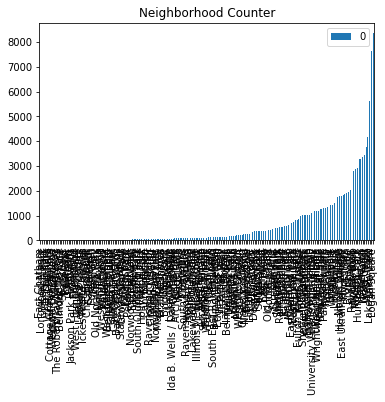

In [71]:
from collections import Counter
import matplotlib.pyplot as plt

nb_counts = Counter(result.neighborhood)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')
plt.title('Neighborhood Counter')
plt.show()

Change category columns with strings to columns with integers with dummy variables for comparison.

#### Replace room type strings with dummy variable for comparison

In [72]:
dummies = pd.get_dummies(result['room_type']).rename(columns=lambda x: 'room_type_' + str(x))
filtered_result = pd.concat([result, dummies], axis=1)
filtered_result = filtered_result.drop(['room_type'], axis=1)
filtered_result.head()

,accommodates,bedrooms,minstay,neighborhood,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
1,8.0,3.0,2.0,Lawndale,5.0,98.0,186,1,0,0
3,14.0,4.0,4.0,Wrightwood Neighbors,4.5,296.0,46,1,0,0
7,8.0,4.0,3.0,Lake View East,4.5,301.0,2,1,0,0
14,10.0,4.0,3.0,Bucktown,4.0,526.0,1,1,0,0
19,2.0,1.0,3.0,Old Town,5.0,108.0,50,1,0,0


#### Replace neighborhood strings with dummy variable for comparison

In [73]:
dummies = pd.get_dummies(filtered_result['neighborhood']).rename(columns=lambda x: 'neighborhood_' + str(x))
filtered_result = pd.concat([filtered_result, dummies], axis=1)
filtered_result = filtered_result.drop(['neighborhood'], axis=1)
filtered_result.head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1,8.0,3.0,2.0,5.0,98.0,186,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,4.0,4.0,4.5,296.0,46,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,8.0,4.0,3.0,4.5,301.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,10.0,4.0,3.0,4.0,526.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,2.0,1.0,3.0,5.0,108.0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filter out values with less than 3 reviews

Since overall satisfaction ratings are not available until after 3 guests have left reviews, rows with less than 3 reviews will be removed.

In [74]:
#19,831 rows with an overall satisfaction score less than 0
#filtered_result.loc[(filtered_result['overall_satisfaction'] < 1)]

In [75]:
#19,795 rows  rows with an overall satisfaction score less than 0 and less than 3 reviews
#filtered_result.loc[(filtered_result['overall_satisfaction'] < 1)&(filtered_result['reviews'] < 3)]

In [76]:
#26536 rows w/less than 3 reviews
#filtered_result.loc[(filtered_result['reviews'] < 3)]

In [77]:
#6741 of the homes w/less than 3 reviews have an overall satisfaction above 0
#filtered_result.loc[(filtered_result['reviews'] < 3)&(filtered_result['overall_satisfaction'] > 0)]

In [78]:
filtered_result.loc[(filtered_result['overall_satisfaction'] < 1)].head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
0,1.0,1.0,NaN,0.0,160.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,NaN,0.0,169.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,NaN,0.0,169.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,NaN,0.0,175.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,NaN,0.0,167.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
filtered_result.loc[(filtered_result['reviews'] == 1)].head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
14,10.0,4.0,3.0,4.0,526.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,6.0,2.0,4.0,2.0,437.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,4.0,2.0,7.0,5.0,267.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,8.0,2.0,2.0,4.5,504.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,3.0,1.0,1.0,4.5,71.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
filtered_result.loc[(filtered_result['reviews'] == 2)].head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
7,8.0,4.0,3.0,4.5,301.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,5.0,2.0,6.0,5.0,218.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,3.0,1.0,5.0,4.5,163.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,1.0,1.0,1.0,2.5,66.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
81,2.0,1.0,90.0,5.0,106.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
filtered_result.loc[(filtered_result['reviews'] == 3)].head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
65,2.0,1.0,2.0,5.0,77.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
91,2.0,2.0,7.0,5.0,82.0,3,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
137,3.0,1.0,29.0,4.5,12.0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
176,2.0,1.0,5.0,4.5,93.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
219,6.0,3.0,3.0,5.0,164.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
filtered_result.loc[(filtered_result['reviews'] == 3)&(filtered_result['overall_satisfaction'] == 0)].head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
972,2.0,1.0,NaN,0.0,349.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3935,6.0,2.0,NaN,0.0,100.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,3.0,1.0,NaN,0.0,88.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7915,2.0,1.0,NaN,0.0,30.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2.0,1.0,NaN,0.0,349.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
reviews = filtered_result['reviews'].tolist()

In [84]:
reviewscount = (reviews.count(2.0),reviews.count(1.0),reviews.count(0.0))
print(reviewscount)

(6325, 8827, 11384)


In [85]:
filtered_result = filtered_result[~np.isclose(filtered_result['reviews'], 0)]

In [86]:
filtered_result = filtered_result[~np.isclose(filtered_result['reviews'], 1)]

In [87]:
filtered_result = filtered_result[~np.isclose(filtered_result['reviews'], 2)]

In [88]:
filtered_result.shape

(91134, 198)

#### Filter out Overall Satisfaction below 4.0? Decided against

In [89]:
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 0)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 0.5)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 1)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 1.5)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 2.0)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 2.5)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 3.0)]
#filtered_result = filtered_result[~np.isclose(filtered_result['overall_satisfaction'], 3.5)]

In [90]:
#1203 overall_satisfaction values less than 4.0
#filtered_result.loc[(filtered_result['overall_satisfaction'] < 4)]

#### Change large number of null minimum stays to median value for comparison

Since there are a large number of minimum stay null values but not quite 90% missing values, the median value for the column will replace null values.

In [91]:
filtered_result.isnull().sum().head()

accommodates                0
bedrooms                    0
minstay                 41075
overall_satisfaction        0
price                       0
dtype: int64

In [92]:
filtered_result['minstay'] = filtered_result['minstay'].replace(0, np.NaN)
# fill missing values with mean column values
filtered_result.fillna(filtered_result.minstay.median(), inplace=True)
# count the number of NaN values in each column
filtered_result.head(11)

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1,8.0,3.0,2.0,5.0,98.0,186,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,4.0,4.0,4.5,296.0,46,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,2.0,1.0,3.0,5.0,108.0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,4.0,1.0,4.0,4.5,217.0,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,7.0,3.0,1.0,4.5,433.0,34,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,3.0,1.0,5.0,4.5,163.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,3.0,1.0,3.0,4.0,108.0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26,6.0,3.0,1.0,4.5,433.0,30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,6.0,2.0,1.0,4.0,274.0,37,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,6.0,3.0,1.0,4.5,323.0,19,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
filtered_result.isnull().sum().head()

accommodates            0
bedrooms                0
minstay                 0
overall_satisfaction    0
price                   0
dtype: int64

In [94]:
filtered_result.describe()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,...,91134.000000,91134.00000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000,91134.000000
mean,3.413040,1.303410,1.604977,4.763749,118.937839,27.140749,0.572969,0.391478,0.035552,0.011379,...,0.000099,0.00959,0.037955,0.001745,0.025073,0.000022,0.004773,0.000165,0.009821,0.011500
std,2.183767,0.791106,5.531738,0.347883,110.420397,35.513293,0.494650,0.488084,0.185171,0.106064,...,0.009937,0.09746,0.191089,0.041733,0.156348,0.004685,0.068924,0.012828,0.098612,0.106618
min,1.000000,0.000000,1.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,4.500000,64.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,5.000000,95.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,2.000000,5.000000,140.000000,33.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,10.000000,500.000000,5.000000,9999.000000,427.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Get Rid of Extreme Outliers and Filter Price

In [95]:
filtered_result.loc[filtered_result['price'] > 500]

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
60,14.0,2.0,1.0,4.5,875.0,44,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
213,6.0,2.0,1.0,4.5,657.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,14.0,6.0,3.0,4.5,822.0,11,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
635,10.0,2.0,2.0,5.0,652.0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,8.0,4.0,1.0,5.0,1013.0,8,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
794,8.0,3.0,2.0,5.0,875.0,21,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979,7.0,3.0,1.0,5.0,652.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1035,8.0,3.0,2.0,5.0,542.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,14.0,2.0,1.0,4.5,897.0,46,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
282,10.0,3.0,2.0,4.5,561.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
filtered_result = filtered_result.loc[filtered_result['price'] <= 500]
filtered_result.head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1,8.0,3.0,2.0,5.0,98.0,186,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,4.0,4.0,4.5,296.0,46,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,2.0,1.0,3.0,5.0,108.0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,4.0,1.0,4.0,4.5,217.0,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,7.0,3.0,1.0,4.5,433.0,34,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
filtered_result.shape

(90356, 198)

In [98]:
low = filtered_result.loc[(filtered_result['minstay']>365)]

In [99]:
low.head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
2051,2.0,1.0,500.0,4.5,46.0,22,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
filtered_result = filtered_result.loc[filtered_result['minstay'] <= 365]
filtered_result.head()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1,8.0,3.0,2.0,5.0,98.0,186,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,4.0,4.0,4.5,296.0,46,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,2.0,1.0,3.0,5.0,108.0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,4.0,1.0,4.0,4.5,217.0,9,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,7.0,3.0,1.0,4.5,433.0,34,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
filtered_result.shape

(90355, 198)

In [102]:
filtered_result.describe()

,accommodates,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,...,90355.00000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000
mean,3.360711,1.284655,1.601561,4.763306,113.129910,27.231111,0.569465,0.394677,0.035859,0.011455,...,0.00010,0.009673,0.037917,0.001760,0.024758,0.000022,0.004814,0.000166,0.009640,0.011278
std,2.080995,0.750933,5.301876,0.348055,75.677914,35.624350,0.495154,0.488784,0.185938,0.106413,...,0.00998,0.097875,0.190997,0.041912,0.155387,0.004705,0.069219,0.012884,0.097708,0.105597
min,1.000000,0.000000,1.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,4.500000,63.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,5.000000,95.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,2.000000,5.000000,140.000000,33.000000,1.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,10.000000,365.000000,5.000000,500.000000,427.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Filter out room type, neighborhood and city for scatterplot and heat map matrix

For the purpose of quick comparison, room type and neighborhood will temporarily be removed for the scatterplot matrix and heat map.

In [103]:
filtered_result1 = filtered_result[filtered_result.columns.drop(list(filtered_result.filter(regex='City')))]

In [104]:
filtered_result2 = filtered_result1[filtered_result1.columns.drop(list(filtered_result1.filter(regex='neighborhood')))]

In [105]:
filtered_result3 = filtered_result2[filtered_result2.columns.drop(list(filtered_result2.filter(regex='room_type')))]

#### To avoid Multicolinearity, Drop Accommodates

In [106]:
filtered_result4 = filtered_result[filtered_result.columns.drop(list(filtered_result.filter(regex='accommodates')))]

In [107]:
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
1,3.0,2.0,5.0,98.0,186,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,4.0,4.5,296.0,46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,1.0,3.0,5.0,108.0,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,1.0,4.0,4.5,217.0,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,3.0,1.0,4.5,433.0,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
filtered_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90355 entries, 1 to 5810
Columns: 198 entries, accommodates to neighborhood_Wrigleyville
dtypes: float64(5), int64(1), uint8(192)
memory usage: 21.4 MB


In [109]:
filtered_result2 = filtered_result4[filtered_result4.columns.drop(list(filtered_result4.filter(regex='neighborhood')))]

In [110]:
#filtered_result3 = filtered_result2[filtered_result2.columns.drop(list(filtered_result2.filter(regex='room_type')))]

#### Save clean data to new file for faster accessibility in the future

In [111]:
# save clean data to new file for faster accessibility in the future
filename = 'AirBNB_cleaned_dataChicagoprice_filtered_result_4_' + str(date.today()) + '.csv'
filtered_result4.to_csv(filename, date_format='%Y-%m-%d %H:%M:%S', index = False)

In [112]:
# save clean data to new file for faster accessibility in the future
filename = 'AirBNB_cleaned_dataChicagoprice_filtered_result_2_' + str(date.today()) + '.csv'
filtered_result2.to_csv(filename, date_format='%Y-%m-%d %H:%M:%S', index = False)